#1. Import 

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING']="1"

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torchvision.transforms as transforms
import torchvision
import torch
import torch.nn as nn

import random
import matplotlib.pyplot as plt
import time

#2. Configure Data

In [ ]:
def per_image_standardization(image):
    """
    This function creates a custom per image standardization
    transform which is used for data augmentation.
    params:
        - image (torch Tensor): Image Tensor that needs to be standardized.
    
    returns:
        - image (torch Tensor): Image Tensor post standardization.
    """
    # get original data type
    orig_dtype = image.dtype

    # compute image mean
    image_mean = torch.mean(image, dim=(-1, -2, -3))

    # compute image standard deviation
    stddev = torch.std(image, axis=(-1, -2, -3))

    # compute number of pixels
    num_pixels = torch.tensor(torch.numel(image), dtype=torch.float32)

    # compute minimum standard deviation
    min_stddev = torch.rsqrt(num_pixels)

    # compute adjusted standard deviation
    adjusted_stddev = torch.max(stddev, min_stddev)

    # normalize image
    image -= image_mean
    image = torch.div(image, adjusted_stddev)

    # make sure that image output dtype  == input dtype
    assert image.dtype == orig_dtype

    return image

def shuffle_pixels(image, indicies):
    image = image.reshape(3,-1)
    image = image[:,indicies]
    image = image.reshape(3,28,28)
    return image

class myNormalize(object):
    def __call__(self,img):
        return  per_image_standardization(img)

class myShuffle(object):
    def __init__(self, shape):
        self.indicies = torch.randperm(shape)
    def __call__(self,img):
        return  shuffle_pixels(img, self.indicies)

In [ ]:
BATCH_SIZE = 4

transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

#3. Upload Data  

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

validset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


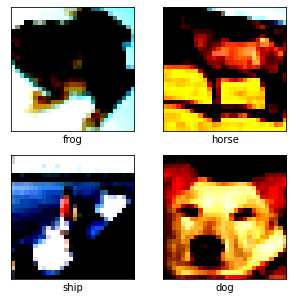

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

#4. Augment Data

##Color Jitter

In [ ]:
#@title
transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

trainset_ColorJitter = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_ColorJitter)
trainloader_ColorJitter = torch.utils.data.DataLoader(trainset_ColorJitter, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


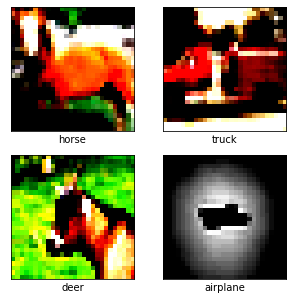

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_ColorJitter, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Crop

In [ ]:
#@title
transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

trainset_RandomCrop = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomCrop)
trainloader_RandomCrop = torch.utils.data.DataLoader(trainset_RandomCrop, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


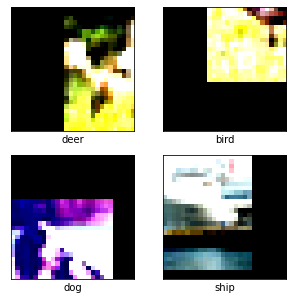

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomCrop, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Horizontal Flip

In [ ]:
#@title
transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

trainset_RandomHorizontalFlip = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomHorizontalFlip)
trainloader_RandomHorizontalFlip = torch.utils.data.DataLoader(trainset_RandomHorizontalFlip, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


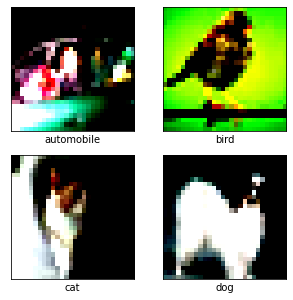

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomHorizontalFlip, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Perspective

In [ ]:
#@title
transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])
trainset_RandomPerspective = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomPerspective)
trainloader_RandomPerspective = torch.utils.data.DataLoader(trainset_RandomPerspective, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


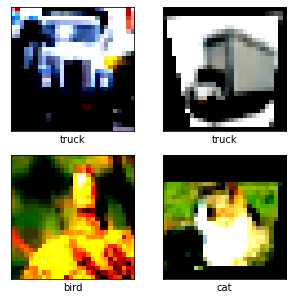

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomPerspective, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Rotation

In [ ]:
#@title
transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])
trainset_RandomRotation = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomRotation)
trainloader_RandomRotation = torch.utils.data.DataLoader(trainset_RandomRotation, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


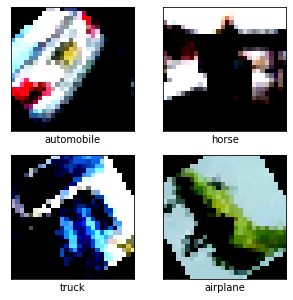

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomRotation, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Erasing

In [ ]:
#@title
transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])
trainset_RandomErasing = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_RandomErasing)
trainloader_RandomErasing = torch.utils.data.DataLoader(trainset_RandomErasing, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


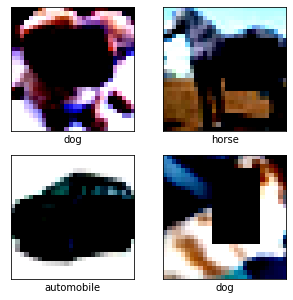

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomErasing, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Pixel Shuffling

In [ ]:
#@title
transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

trainset_Shuffle = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_Shuffle)
trainloader_Shuffle = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


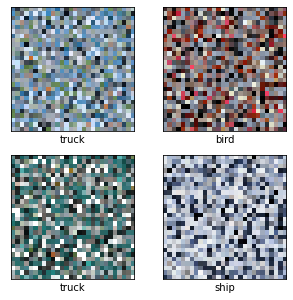

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_Shuffle, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)
    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

##Random Labels

In [ ]:
transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])

BATCH_SIZE = 256

trainset_RandomLabel = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

random.shuffle(trainset_RandomLabel.targets)

trainloader_RandomLabel = torch.utils.data.DataLoader(trainset_RandomLabel, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


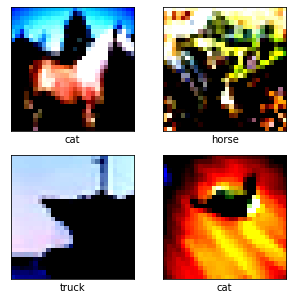

In [ ]:
#@title
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               
for i, data in enumerate(trainloader_RandomLabel, 0):
    inputs, labels = data
    inputs = torch.movedim(inputs, 1, -1)

    
    plt.figure(figsize=(5,5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(inputs[i])
        plt.xlabel(class_names[labels[i]])
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.show()
    
    break

# Start Here

##Transformations

In [ ]:
#@title
transform_train = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myNormalize()
    ])


transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.ColorJitter(),
    myNormalize()
    ])

transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    myNormalize()
    ])

transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    myNormalize()
    ])

transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    myNormalize()
    ])

transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    myNormalize()
    ])

transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    myNormalize()
    ])

transform_Shuffle = transforms.Compose([
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    myShuffle(28*28)
    ])

##CIFAR10

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = -1 #0 is transform_train

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


##CIFAR100

In [ ]:
#Pick your transformation. These are your options:
#if you want Random Labels, it is the same as transform_train just add random.shuffle(trainset_RandomLabel.targets) after you load the trainset

transformations = [transform_train, #(this one has no extra modifications, just crop and normalization)
transform_ColorJitter, 
transform_RandomCrop, 
transform_RandomHorizontalFlip, 
transform_RandomPerspective, 
transform_RandomRotation, 
transform_RandomErasing, 
transform_Shuffle]

#index of transformaion in list above
transform_index = 3 #0 is transform_train

class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
               'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
	             'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
               'containers'	'bottles', 'bowls', 'cans', 'cups', 'plates',
               'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
                'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
                'bed', 'chair', 'couch', 'table', 'wardrobe',
	              'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
	              'bear', 'leopard', 'lion', 'tiger', 'wolf',
	              'bridge', 'castle', 'house', 'road', 'skyscraper',
	              'cloud', 'forest', 'mountain', 'plain', 'sea',
	              'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
	              'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
	              'crab', 'lobster', 'snail', 'spider', 'worm',
	              'baby', 'boy', 'girl', 'man', 'woman',
	              'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
	              'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
	              'maple', 'oak', 'palm', 'pine', 'willow',
	              'bicycle', 'bus', 'motorcycle', 'pickup' 'truck', 'train',
	              'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

selectedTransform = transformations[transform_index]

#Pick your batch size:
BATCH_SIZE = 4

trainset_100 = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=selectedTransform)
trainloader_100 = torch.utils.data.DataLoader(trainset_Shuffle, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

valset_100 = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=selectedTransform)
valloader_100 = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


# AlexNet

In [ ]:
class AlexNet(nn.Module):

    def __init__(self, num_classes = 10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 95, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(4),

            nn.Conv2d(95, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(4)
        )
        self.classifier = nn.Sequential(
            # nn.Dropout(),
            nn.Linear(256 * 6 * 6, 384),
            nn.ReLU(inplace=True),
            # nn.Dropout(),
            nn.Linear(384, 192),
            nn.ReLU(inplace=True),
            nn.Linear(192, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
model = AlexNet(10)

for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    print(inputs.shape)
    print(model(inputs).shape)
    break

torch.Size([256, 3, 28, 28])
torch.Size([256, 10])


In [ ]:
from __future__ import print_function

# import os
import logging
# import numpy as np
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import torch.optim


def train_model(model, train_loader, val_loader,start_epoch=None, epochs=300):
  cudnn.benchmark = True

  # define loss function (criterion) and pptimizer
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = torch.optim.SGD(model.parameters(), 0.01,
                              momentum=0.9,
                              weight_decay=1e-4)

  start_epoch = start_epoch or 0
  epochs = epochs
  acc_count = 0

  for epoch in range(start_epoch, epochs):
    adjust_learning_rate(optimizer, epoch, 0.01)

    # train for one epoch
    tr_loss, tr_prec1 = train_epoch(train_loader, model, criterion, optimizer, epoch)

    # evaluate on validation set
    val_loss, val_prec1 = validate_epoch(val_loader, model, criterion, epoch)

    #if args.eval_full_trainset:
    #  tr_loss, tr_prec1 = validate_epoch(train_loader, model, criterion, epoch, args)

    print(epoch, tr_prec1, val_prec1, tr_loss, val_loss)
    torch.save(model.state_dict(), "/content/gdrive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/AlexNet/latest_model_checkpoint")
    logging.info('%03d: Acc-tr: %6.2f, Acc-val: %6.2f, L-tr: %6.4f, L-val: %6.4f',
                 epoch, tr_prec1, val_prec1, tr_loss, val_loss)
    if tr_prec1 == 100:
      acc_count += 1
      print("Scored 100%")
    if acc_count > 5:
      break

def train_model_plot(model, directory, train_loader, val_loader,start_epoch=None, epochs=110):
  cudnn.benchmark = True

  # define loss function (criterion) and pptimizer
  criterion = nn.CrossEntropyLoss().cuda()
  optimizer = torch.optim.SGD(model.parameters(), 0.01,
                              momentum=0.9,
                              weight_decay=1e-4)

  start_epoch = start_epoch or 0
  epochs = epochs

  train_acc = 0

  epoch_list, train_losses, val_losses, train_accs, val_accs = [], [], [], [], []
  start_time=time.time()
  while train_acc < 100:
    for epoch in range(start_epoch, epochs):
      adjust_learning_rate(optimizer, epoch, 0.1)

      # train for one epoch
      train_loss, train_acc = train_epoch(train_loader, model, criterion, optimizer, epoch)
      train_accs.append(train_acc)
      train_losses.append(train_loss)

      # evaluate on validation set
      val_loss, val_acc = validate_epoch(val_loader, model, criterion, epoch)
      val_accs.append(val_acc)
      val_losses.append(val_loss)

      epoch_list.append(epoch)
      logging.info('%03d: Acc-tr: %6.2f, Acc-val: %6.2f, L-tr: %6.4f, L-val: %6.4f',
                    epoch, train_acc, val_acc, train_loss, val_loss)
           
      torch.save(model.state_dict(), directory)
      #/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/Data Augmentation Runs/WRN/WRNModel
      print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))

    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Loss Curve")
    plt.plot(epoch_list, train_losses, label="Train")
    plt.plot(epoch_list, val_losses, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Accuracy Curve")
    plt.plot(epoch_list, train_accs, label="Train")
    plt.plot(epoch_list, val_accs, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    #plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_accs[-1]))
    print("Final Validation Accuracy: {}".format(val_accs[-1]))


def get_model(model):
  # create model
  if model == 'wide-resnet':
    model = WideResNet(28, 10, 1,drop_rate=0.0)

  elif model == 'mlp':
    n_units = [int(x) for x in '512'.split('x')] # hidden dims
    n_units.append(10)  # output dim
    n_units.insert(0, 32*32*3)        # input dim
    model = MLP(n_units)

  elif model == 'alexnet':
    model = AlexNet(10)

  # for training on multiple GPUs.
  # Use CUDA_VISIBLE_DEVICES=0,1 to specify which GPUs to use
  # model = torch.nn.DataParallel(model).cuda()
  model = model.cuda()

  return model

def train_epoch(train_loader, model, criterion, optimizer, epoch):
  """Train for one epoch on the training set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to train mode
  model.train()

  for i, (input, target) in enumerate(train_loader):
    target = target.cuda(non_blocking=True)
    input = input.cuda()
    input_var = torch.autograd.Variable(input)
    target_var = torch.autograd.Variable(target)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

    # compute gradient and do SGD step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  return losses.avg, top1.avg


def validate_epoch(val_loader, model, criterion, epoch):
  """Perform validation on the validation set"""
  batch_time = AverageMeter()
  losses = AverageMeter()
  top1 = AverageMeter()

  # switch to evaluate mode
  model.eval()

  for i, (input, target) in enumerate(val_loader):
    # target = target.cuda(non_blocking=True)
    target = target.cuda()
    input = input.cuda()
    input_var = torch.autograd.Variable(input, volatile=True)
    target_var = torch.autograd.Variable(target, volatile=True)

    # compute output
    output = model(input_var)
    loss = criterion(output, target_var)

    # measure accuracy and record loss
    prec1 = accuracy(output.data, target, topk=(1,))[0]
    losses.update(loss.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))

  return losses.avg, top1.avg


class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count


def adjust_learning_rate(optimizer, epoch, lr_0):
  """Sets the learning rate to the initial LR decayed by 10 after 150 and 225 epochs"""
  lr = lr_0 * (0.1 ** (epoch // 150)) * (0.1 ** (epoch // 225))
  for param_group in optimizer.param_groups:
      param_group['lr'] = lr


def accuracy(output, target, topk=(1,)):
  """Computes the precision@k for the specified values of k"""
  maxk = max(topk)
  batch_size = target.size(0)

  _, pred = output.topk(maxk, 1, True, True)
  pred = pred.t()
  correct = pred.eq(target.view(1, -1).expand_as(pred))

  res = []
  for k in topk:
      correct_k = correct[:k].view(-1).float().sum(0)
      res.append(correct_k.mul_(100.0 / batch_size))
  return res


def setup_logging(name):
  import datetime
  exp_dir = os.path.join('/content/gdrive/MyDrive/MIE424H1 Final Project/Data Randomization/runs', name)
  if not os.path.isdir(exp_dir):
    os.makedirs(exp_dir)
  log_fn = os.path.join(exp_dir, "LOG.{0}.shuffle2.txt".format(datetime.date.today().strftime("%y%m%d")))
  logging.basicConfig(filename=log_fn, filemode='w', level=logging.DEBUG)
  # also log into console
  console = logging.StreamHandler()
  console.setLevel(logging.INFO)
  logging.getLogger('').addHandler(console)
  print('Logging into %s...' % exp_dir)


def main(name, model, train):
  setup_logging(name)
  if train == 'train':
    train_loader = trainloader
    #for i, (input, target) in enumerate(train_loader):
    #  print(input.size())
    #  break
    val_loader = valloader
    model = get_model(model)
    print('Number of parameters: ', sum([p.data.nelement() for p in model.parameters()]))
    directory = "/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/Data Augmentation Runs/WRN/WRNModel_Color_Jitter"

    train_model_plot(model,directory, directory, train_loader, val_loader)

def main2(name, model, train):
  setup_logging(name)
  if train == 'train':
    train_loader = trainloader
    #for i, (input, target) in enumerate(train_loader):
    #  print(input.size())
    #  break
    val_loader = valloader
    # model = get_model(model)
    print('Number of parameters: ', sum([p.data.nelement() for p in model.parameters()]))
    train_model(model, train_loader, val_loader)


In [ ]:
main("Alexnet",'alexnet','train')

Logging into /content/gdrive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/Alexnet...
Number of parameters:  4230654


TypeError: ignored

In [ ]:
z# normal = open("/content/gdrive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/Alexnet/LOG.210411.normal.txt", 'r')
# shuffle = open("/content/gdrive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/Alexnet/LOG.210411.shuffle.txt", 'r')
# random = open("/content/gdrive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/Alexnet/LOG.210412.random.txt", 'r')
book1 = open("/content/Book1.txt", "r")
import re

In [ ]:


t_acc = []
t_loss = []
v_acc = []
v_loss = []
for line in book1:
  print(line)
  line = line.replace('"', "")
  print(line)
  train_acc = re.search('Acc-tr: (.+?),', line)
  train_loss = re.search('L-tr: (.+?),', line)
  val_acc = re.search('Acc-val:  (.+?),', line)
  val_loss = re.search('L-val: (.*)', line)
  # print(val_loss)
  if train_acc:
      t_acc.append(float(train_acc.group(1).strip()))
      t_loss.append(float(train_loss.group(1).strip()))
      v_acc.append(float(val_acc.group(1).strip()))
      v_loss.append(float(val_loss.group(1).strip()))
book1.close()

"000: Acc-tr:  18.49, Acc-val:  25.20, L-tr: 2.1599, L-val: 1.9790"

000: Acc-tr:  18.49, Acc-val:  25.20, L-tr: 2.1599, L-val: 1.9790

"001: Acc-tr:  25.15, Acc-val:  29.19, L-tr: 1.9671, L-val: 1.9061"

001: Acc-tr:  25.15, Acc-val:  29.19, L-tr: 1.9671, L-val: 1.9061

"002: Acc-tr:  28.28, Acc-val:  32.16, L-tr: 1.9014, L-val: 1.8481"

002: Acc-tr:  28.28, Acc-val:  32.16, L-tr: 1.9014, L-val: 1.8481

"003: Acc-tr:  31.66, Acc-val:  33.09, L-tr: 1.8256, L-val: 1.7765"

003: Acc-tr:  31.66, Acc-val:  33.09, L-tr: 1.8256, L-val: 1.7765

"004: Acc-tr:  35.30, Acc-val:  36.23, L-tr: 1.7400, L-val: 1.7070"

004: Acc-tr:  35.30, Acc-val:  36.23, L-tr: 1.7400, L-val: 1.7070

"005: Acc-tr:  38.95, Acc-val:  38.45, L-tr: 1.6454, L-val: 1.6714"

005: Acc-tr:  38.95, Acc-val:  38.45, L-tr: 1.6454, L-val: 1.6714

"006: Acc-tr:  42.40, Acc-val:  44.02, L-tr: 1.5592, L-val: 1.5273"

006: Acc-tr:  42.40, Acc-val:  44.02, L-tr: 1.5592, L-val: 1.5273

"007: Acc-tr:  45.89, Acc-val:  45.10, L-tr: 1.4

In [ ]:
print(v_loss)

[1.979, 1.9061, 1.8481, 1.7765, 1.707, 1.6714, 1.5273, 1.4877, 1.4834, 1.4153, 1.3901, 1.4612, 1.4071, 1.4528, 1.5892, 1.7044, 1.5461, 1.9891, 1.7807, 2.299, 2.0588, 2.28, 2.3325, 2.2321, 2.5217, 2.7914, 3.0852, 2.771, 2.8475, 3.0051, 3.2095, 3.6481, 3.1552, 3.5453, 3.4268, 3.3731, 3.6583, 3.6759, 3.7198, 4.1805, 3.8165, 3.8346, 4.0184, 4.1868, 4.2071, 4.0562, 4.3459, 4.2765, 4.2966, 4.6845, 4.6884, 4.8784, 4.9476, 4.4954, 4.693, 4.2788, 4.9523, 4.9168, 5.1303, 4.5836, 4.6486, 4.6985, 4.623, 5.0429, 4.8968, 5.3035, 4.7275, 5.1908, 4.5107, 5.0888, 5.0053, 5.0219, 5.1437, 5.4724, 5.3838, 5.3634, 5.3325, 5.4557, 5.463, 5.4562, 5.4464, 5.4414, 5.4289]


Text(0, 0.5, 'Accuracy')

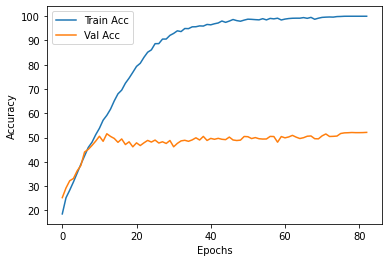

In [ ]:

plt.plot([i for i in range(len(t_acc))], 
         t_acc, label = 'Train Acc')
plt.plot([i for i in range(len(t_acc))], 
         v_acc, label = 'Val Acc')
plt.legend(loc="upper left")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

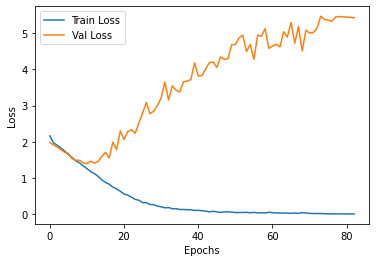

In [ ]:
plt.plot([i for i in range(len(t_loss))], 
         t_loss, label = 'Train Loss')
plt.plot([i for i in range(len(t_loss))], 
         v_loss, label = 'Val Loss')
plt.legend(loc="upper left")

plt.xlabel('Epochs')
plt.ylabel('Loss')